# Question 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math

In [2]:
#Generating the number of samples
pw1=0.15
pw2=0.35
pw3=0.5

l=[]
l=np.random.uniform(0,1,10000)
n1=len([i for i in l if (i<=0.15)])
n2=len([i for i in l if (i >= 0.15 and i<=0.5)])
n3=len([i for i in l if (i >= 0.5 and i<1)])
print("No of Points in Dataset-1",n1)
print("No of Points in Dataset-2",n2)
print("No of Points in Dataset-3",n3)

No of Points in Dataset-1 1480
No of Points in Dataset-2 3490
No of Points in Dataset-3 5030


In [3]:
def linear_transformation(mu, cov, n):
    mean=[0,0]
    covariance=[[1,0],[0,1]]
    
    
    z = np.random.multivariate_normal(mean,covariance,n).T
    b = mu
    A = np.linalg.cholesky(cov)
    
    x=np.dot(A,z)
    
    for i in range(0,n):
        x[:,i]=x[:,i]+b
    
    return x


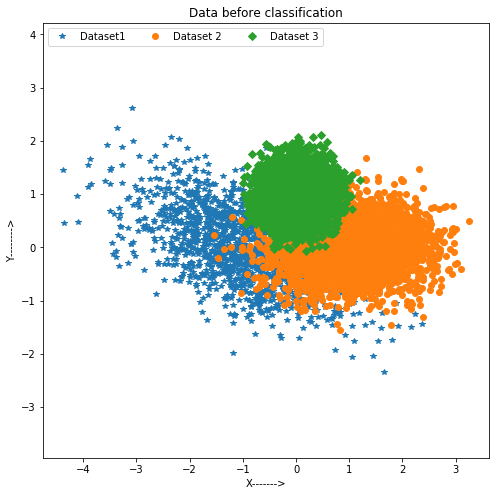

In [4]:
mu1=[-1,0];
cov1=[[1,-0.4],[-0.4,0.5]]

x1=linear_transformation(mu1,cov1,n1)
x1_axis=x1[0,:]
y1_axis=x1[1,:]

mu2=[1,0];
cov2=[[0.5,0],[0,0.2]]

x2=linear_transformation(mu2,cov2,n2)
x2_axis=x2[0,:]
y2_axis=x2[1,:]

mu3=[0,1];
cov3=[[0.1,0],[0,0.1]]

x3=linear_transformation(mu3,cov3,n3)
x3_axis=x3[0,:]
y3_axis=x3[1,:]

plt.figure(figsize=(8,8))
plt.plot(x1_axis,y1_axis,'*',label='Dataset1');
plt.plot(x2_axis,y2_axis,'o',label ='Dataset 2');
plt.plot(x3_axis,y3_axis,'D',label ='Dataset 3');
plt.axis('equal')
plt.title("Data before classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()





In [5]:
def pdf(x, mu, cov):
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( math.pow((2*np.pi),float(2)/2) * math.pow(det,1.0/2) )
    x_mu = np.matrix(x - mu)
    inv = cov.I
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    return norm_const * result

In [6]:
def maximum(x):
    p1=pdf(np.matrix(x), mu1, np.matrix(cov1))*pw1
    p2=pdf(np.matrix(x), mu2, np.matrix(cov2))*pw2
    p3=pdf(np.matrix(x), mu3, np.matrix(cov3))*pw3
    i=np.argmax(np.matrix([p1,p2,p3]))
    return i+1
           

(2, 1480)

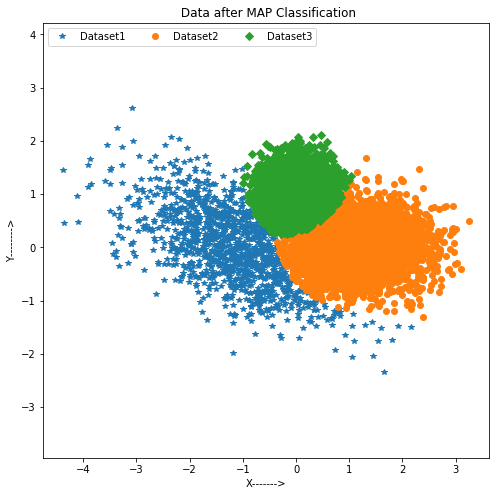

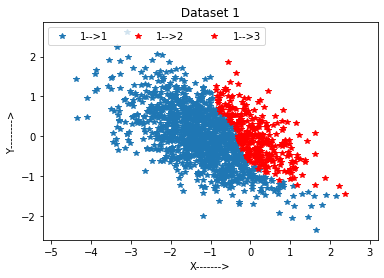

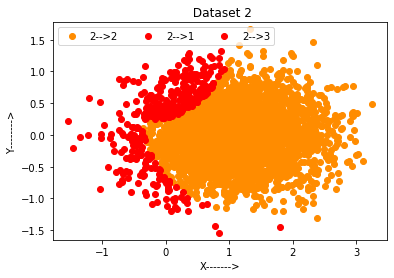

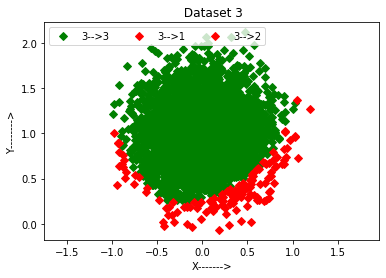

In [7]:
res1=[]
res2=[]
res3=[]

err1_2=[]
err1_3=[]
err2_1=[]
err2_3=[]
err3_1=[]
err3_2=[]


for i in range(n1):
    if(maximum(x1[:,i])==1):
        res1.append(x1[:,i])
    elif(maximum(x1[:,i])==2):
        err1_2.append(x1[:,i])
    else:
        err1_3.append(x1[:,i])
        

        
for i in range(n2):
    if(maximum(x2[:,i])==2):
        res2.append(x2[:,i])
    elif(maximum(x2[:,i])==1):
        err2_1.append(x2[:,i])
    else:
        err2_3.append(x2[:,i])
        
for i in range(n3):
    if(maximum(x3[:,i])==3):
        res3.append(x3[:,i])
    elif(maximum(x3[:,i])==1):
        err3_1.append(x3[:,i])
    else:
        err3_2.append(x3[:,i])



def column(matrix, i):
    return [row[i] for row in matrix]

plt.figure(figsize=(8,8))

plt.plot(column(res1,0),column(res1,1),'*',label='Dataset1');
plt.plot(column(res2,0),column(res2,1),'o',label='Dataset2');
plt.plot(column(res3,0),column(res3,1),'D',label='Dataset3');
plt.axis('equal')
plt.title(" Data after MAP Classification")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()  


plt.plot(column(res1,0),column(res1,1),'*',label='1-->1');
plt.plot(column(err1_2,0),column(err1_2,1),'*',color='r',label='1-->2');
plt.plot(column(err1_3,0),column(err1_3,1),'*',color='r',label='1-->3');
plt.axis('equal')
plt.title(" Dataset 1 ")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()  

plt.plot(column(res2,0),column(res2,1),'o',color='darkorange',label='2-->2');
plt.plot(column(err2_1,0),column(err2_1,1),'o',color='r',label='2-->1');
plt.plot(column(err2_3,0),column(err2_3,1),'o',color='r',label='2-->3');
plt.axis('equal')
plt.title(" Dataset 2")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()  

plt.plot(column(res3,0),column(res3,1),'D',color='g',label='3-->3');
plt.plot(column(err3_1,0),column(err3_1,1),'D',color='r',label='3-->1');
plt.plot(column(err3_2,0),column(err3_2,1),'D',color='r',label='3-->2');
plt.axis('equal')
plt.title(" Dataset 3")
plt.xlabel('X------->')
plt.ylabel('Y-------->')
plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.show()  


In [781]:
print("1 Misclassified as 2 = ", len(err1_2))
print("1 Misclassified as 3 = ", len(err1_3))
print("2 Misclassified as 1 = ", len(err2_1))
print("2 Misclassified as 3 = ", len(err2_3))
print("3 Misclassified as 1 = ", len(err3_1))
print("3 Misclassified as 1 = ", len(err2_1))
print()
print("Total number of Samples Misclassified by the classifier =", len(err1_2)+len(err1_3)+len(err2_1)+len(err2_3)+len(err3_1)+len(err3_2))

P_error=(len(err1_2)+len(err1_3)+len(err2_1)+len(err2_3)+len(err3_1)+len(err3_2))/10000
print("probability of error = ", P_error)

1 Misclassified as 2 =  212
1 Misclassified as 3 =  96
2 Misclassified as 1 =  126
2 Misclassified as 3 =  204
3 Misclassified as 1 =  34
3 Misclassified as 1 =  126

Total number of Samples Misclassified by the classifier = 767
probability of error =  0.0767


Text(0.5, 42.0, 'True Class Labels')

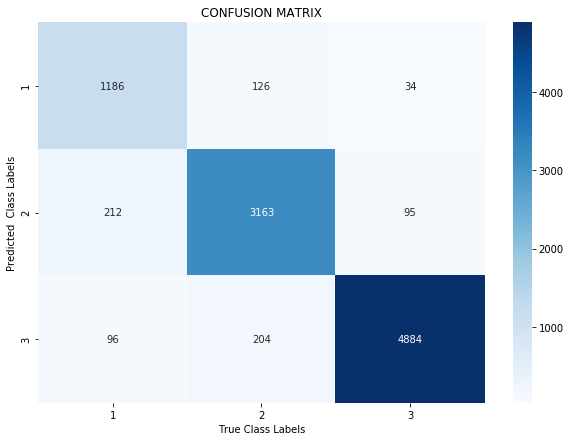

In [779]:
import seaborn as sn
import pandas as pd

array=[[len(res1),len(err2_1),len(err3_1)],
       [len(err1_2),len(res2),len(err3_2)],
       [len(err1_3),len(err2_3),len(res3)]]

df_cm = pd.DataFrame(array, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))

sn.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')
plt.title("CONFUSION MATRIX")
plt.ylabel("Predicted  Class Labels")
plt.xlabel("True Class Labels")

## Question 3

In [962]:
#X values
x_org=np.random.uniform(-1,1,11)
x=x_org[0:10]

#noise
sigma=0.1
v=np.random.normal(0,pow(sigma,2),10)


Dataset Generated with w_true

In [963]:
w_true=np.array([[1,0,-0.25,0]])

def f(x,w):
    return np.dot(w,x.T)
y=[]



for i in range(10):
    x_vec=np.array([[pow(x[i],3),pow(x[i],2),pow(x[i],1),pow(x[i],0)]])
    y.append(f(x_vec,w_true))
y1=np.array(y)   
print(np.shape(w_true))

(1, 4)


Text(0.5, 1.0, 'Data generation without noise')

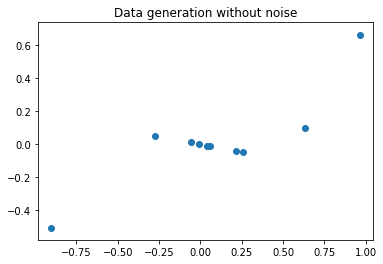

In [964]:
plt.scatter(x[:],y1)
plt.axis('equal')
plt.title('Data generation without noise')

Dataset generated with noise and w_true with $\sigma = 0.3$

Text(0.5, 1.0, 'Data generation with noise')

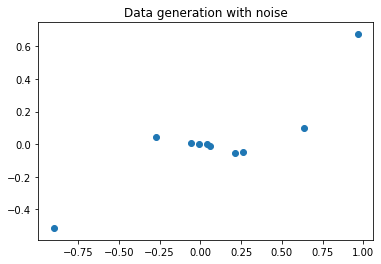

In [965]:
y.clear()


for i in range(10):
    x_vec=np.array([pow(x[i],3),pow(x[i],2),pow(x[i],1),pow(x[i],0)])
    y.append(f(x_vec,w_true)+v[i])
y1=np.array(y)
plt.scatter(x[:],y1)
plt.axis('equal')
plt.title('Data generation with noise')

Text(0, 0.5, 'MAP-MLE')

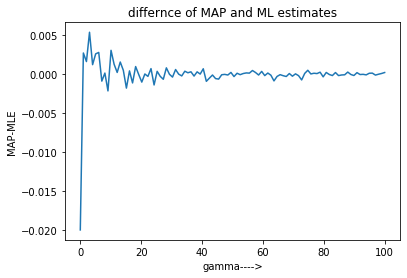

In [966]:
B=2
gamma=np.linspace(pow(10,-B),pow(10,B),num=100)
mean=[0,0,0,0]
cov=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
MAP=[]
ML=[]
y=np.zeros(10)
xtest=x_org[10]

for i in range(100):
    w=np.random.multivariate_normal(mean,np.dot(cov,pow(gamma[i],2)),1)
    
    for j in range(10):
        x_vec=np.array([pow(x[j],3),pow(x[j],2),pow(x[j],1),pow(x[j],0)])
        y[j]=f(x_vec,w)+v[j]
    X=np.zeros((10,4))
    for k in range(10):
        for n in range(4):
            X[k][n]=pow(x[k],3-n)
    I_d=np.multiply(np.identity(4),(pow(sigma,2)/pow(gamma[i],2)))
    l=np.add(np.dot(X.T,X),I_d)
    m=np.dot(X.T,y.T)
    w_est=np.dot(np.linalg.inv(l),m)
    xtest_vec=np.array([pow(xtest,3),pow(xtest,2),pow(xtest,1),pow(xtest,0)])
    MAP.append(f(xtest_vec,w_est))
    l_mle=np.dot(X.T,X)
    w_est=np.dot(np.linalg.inv(l_mle),m)
    ML.append(f(xtest_vec,w_est))

diff=list(map(float.__sub__, MAP, ML))


plt.plot(gamma,diff)
plt.title('differnce of MAP and ML estimates')
plt.xlabel('gamma---->')
plt.ylabel('MAP-MLE')


Text(0.5, 0, 'gamma-------->')

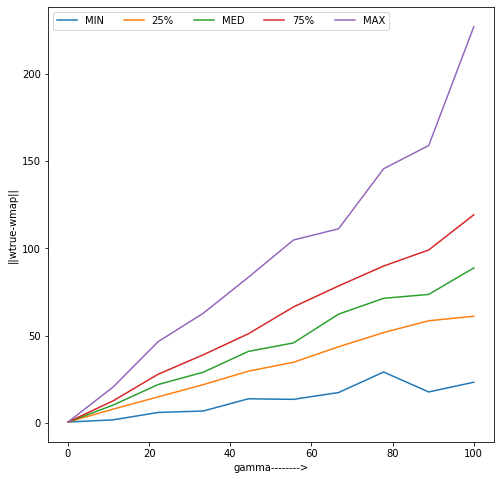

In [982]:
LSE=[]
MAX=[]
MIN=[]
MED=[]
q1=[]
q3=[]
B=2
gamma=np.linspace(pow(10,-B),pow(10,B),num=10)
for i in range(10):
    
    w=np.random.multivariate_normal(mean,np.dot(cov,pow(gamma[i],2)),100)
    
    for exp in range(100):
        
        for j in range(10):
            x_vec=np.array([[pow(x[j],3),pow(x[j],2),pow(x[j],1),pow(x[j],0)]])
            y[j]=f(x_vec,w[exp,:])+v[j]
        X=np.zeros((10,4))
        for k in range(10):
            for n in range(4):
                X[k][n]=pow(x[k],3-n)
        I_d=np.multiply(np.identity(4),(pow(sigma,2)/pow(gamma[i],2)))
        l=np.add(np.dot(X.T,X),I_d)
        m=np.dot(X.T,y)
        w_est=np.dot(np.linalg.inv(l),m)
        mse =np.sqrt((np.square(w_est - w_true)).mean(axis=None))
        LSE.append(mse)
    LSE.sort()
    MIN.append(LSE[0])
    MAX.append(LSE[99])
    MED.append((LSE[49]+LSE[50])/2)
    q1.append(LSE[24])
    q3.append(LSE[74])
    LSE.clear()

plt.figure(figsize=(8,8))
plt.plot(gamma,MIN,label='MIN')
plt.plot(gamma,q1,label='25%')
plt.plot(gamma,MED,label='MED')
plt.plot(gamma,q3,label='75%')
plt.plot(gamma,MAX,label='MAX')

plt.legend(scatterpoints=3,loc='upper left',ncol=5,fontsize=10)
plt.ylabel('||wtrue-wmap||')
plt.xlabel('gamma-------->')
    
    
    
    

## Question 2

In [784]:
import math
pi = math.pi

Points=[[1,0],[-1,0],[0,1],[0,-1]]

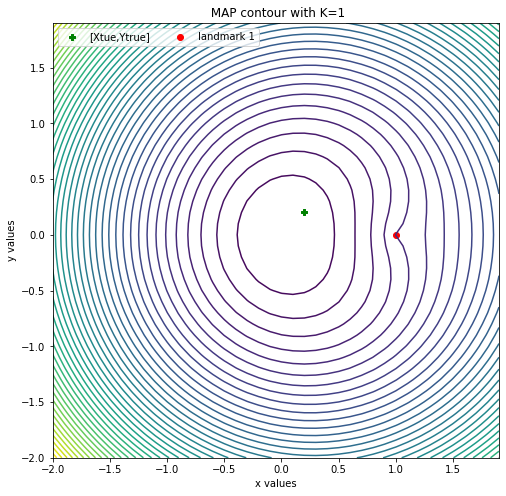

In [802]:
x1=Points[0][0]
y1=Points[0][1]
x_true=0.2
y_true=0.2
sigma=0.3
sigmax=0.25
sigmay=0.25

i=0
ni=np.zeros(4)
while(i<4):
    k=np.random.normal(0,pow(sigma,2),1)
    if(k>0):
        ni[i]=k
        i=i+1

@np.vectorize
def f(x,y):
    r1=math.sqrt(pow(x_true-x1,2)+pow(y_true-y1,2))+ni[0]
    dt1=math.sqrt(pow(x-x1,2)+pow(y-y1,2))
    m=(pow((r1-dt1),2)/(2*pow(sigma,2)))+((pow(x,2)/(2*pow(sigmax,2)))+(pow(y,2)/(2*pow(sigmay,2))))
    
    return (m)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z,levels=50);
plt.scatter(x_true,y_true,marker='P',color='g',label="[Xtue,Ytrue]")
plt.scatter(x1,y1,marker='o',color='r',label='landmark 1')
plt.legend(scatterpoints=1,loc='upper left',ncol=5,fontsize=10)
plt.title(' MAP contour with K=1')
plt.ylabel('y values')
plt.xlabel('x values')

plt.show()




Text(0.5, 0, 'x values')

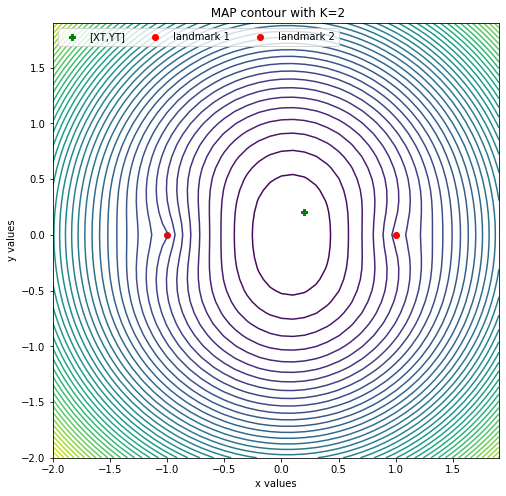

In [801]:
x2=Points[1][0]
y2=Points[1][1]

@np.vectorize
def f(x,y):
    r1=math.sqrt(pow(x_true-x1,2)+pow(y_true-y1,2))+ni[0]
    dt1=math.sqrt(pow(x-x1,2)+pow(y-y1,2))
    r2=math.sqrt(pow(x_true-x2,2)+pow(y_true-y2,2))+ni[1]
    dt2=math.sqrt(pow(x-x2,2)+pow(y-y2,2))
    m=(pow((r1-dt1),2)/(2*pow(sigma,2)))+(pow((r2-dt2),2)/(2*pow(sigma,2)))+((pow(x,2)/(2*pow(sigmax,2)))+(pow(y,2)/(2*pow(sigmay,2))))
    return (m)
    
        
Z = f(X, Y)
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z,levels=50);
plt.scatter(x_true,y_true,marker='P',color='g',label="[XT,YT]")
plt.scatter(x1,y1,marker='o',color='r',label='landmark 1')
plt.scatter(x2,y2,marker='o',color='r',label='landmark 2')
plt.legend(scatterpoints=1,loc='upper left',ncol=5,fontsize=10)
plt.title(' MAP contour with K=2')
plt.ylabel('y values')
plt.xlabel('x values')

Text(0.5, 0, 'x values')

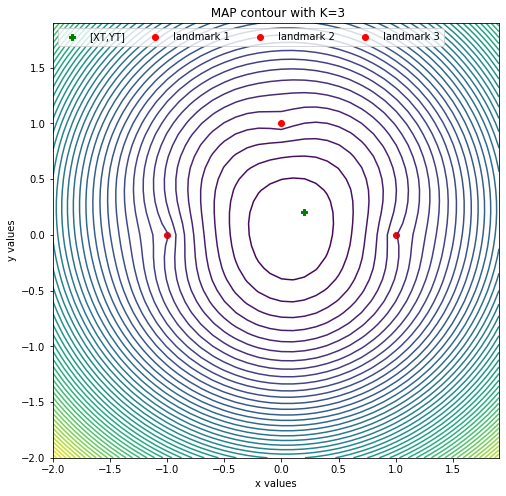

In [800]:
x3=Points[2][0]
y3=Points[2][1]

@np.vectorize
def f(x,y):
    r1=math.sqrt(pow(x_true-x1,2)+pow(y_true-y1,2))+ni[0]
    dt1=math.sqrt(pow(x-x1,2)+pow(y-y1,2))
    r2=math.sqrt(pow(x_true-x2,2)+pow(y_true-y2,2))+ni[1]
    dt2=math.sqrt(pow(x-x2,2)+pow(y-y2,2))
    r3=math.sqrt(pow(x_true-x3,2)+pow(y_true-y3,2))+ni[2]
    dt3=math.sqrt(pow(x-x3,2)+pow(y-y3,2))
    m=(pow((r1-dt1),2)/(2*pow(sigma,2)))+(pow((r2-dt2),2)/(2*pow(sigma,2)))+(pow((r3-dt3),2)/(2*pow(sigma,2)))+((pow(x,2)/(2*pow(sigmax,2)))+(pow(y,2)/(2*pow(sigmay,2))))
    return (m)
    
Z = f(X, Y)
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z,levels=50);
plt.scatter(x_true,y_true,marker='P',color='g',label="[XT,YT]")
plt.scatter(x1,y1,marker='o',color='r',label='landmark 1')
plt.scatter(x2,y2,marker='o',color='r',label='landmark 2')
plt.scatter(x3,y3,marker='o',color='r',label='landmark 3')
plt.legend(scatterpoints=1,loc='upper left',ncol=5,fontsize=10)
plt.title(' MAP contour with K=3')
plt.ylabel('y values')
plt.xlabel('x values')


Text(0.5, 0, 'x values')

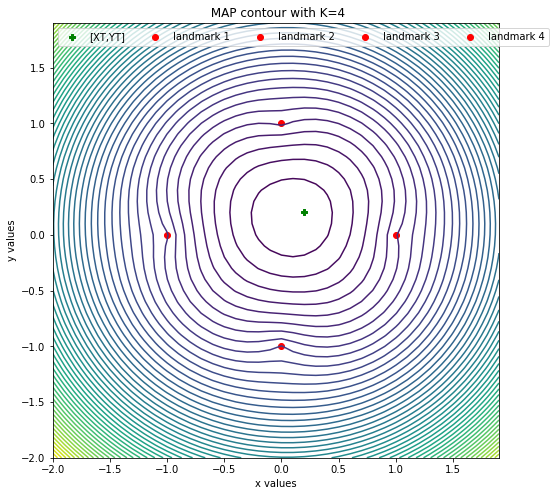

In [799]:
x4=Points[3][0]
y4=Points[3][1]

@np.vectorize
def f(x,y):
    r1=math.sqrt(pow(x_true-x1,2)+pow(y_true-y1,2))+ni[0]
    dt1=math.sqrt(pow(x-x1,2)+pow(y-y1,2))
    r2=math.sqrt(pow(x_true-x2,2)+pow(y_true-y2,2))+ni[1]
    dt2=math.sqrt(pow(x-x2,2)+pow(y-y2,2))
    r3=math.sqrt(pow(x_true-x3,2)+pow(y_true-y3,2))+ni[2]
    dt3=math.sqrt(pow(x-x3,2)+pow(y-y3,2))
    r4=math.sqrt(pow(x_true-x4,2)+pow(y_true-y4,2))+ni[3]
    dt4=math.sqrt(pow(x-x4,2)+pow(y-y4,2))
    m=(pow((r1-dt1),2)/(2*pow(sigma,2)))+(pow((r2-dt2),2)/(2*pow(sigma,2)))+(pow((r3-dt3),2)/(2*pow(sigma,2)))+(pow((r4-dt4),2)/(2*pow(sigma,2)))+((pow(x,2)/(2*pow(sigmax,2)))+(pow(y,2)/(2*pow(sigmay,2))))
    
    return (m)
Z = f(X, Y)
plt.figure(figsize=(8,8))
plt.contour(X, Y, Z,levels=50);
plt.scatter(x_true,y_true,marker='P',color='g',label="[XT,YT]")
plt.scatter(x1,y1,marker='o',color='r',label='landmark 1')
plt.scatter(x2,y2,marker='o',color='r',label='landmark 2')
plt.scatter(x3,y3,marker='o',color='r',label='landmark 3')
plt.scatter(x4,y4,marker='o',color='r',label='landmark 4')
plt.legend(scatterpoints=1,loc='upper left',ncol=5,fontsize=10)
plt.title(' MAP contour with K=4')
plt.ylabel('y values')
plt.xlabel('x values')

